In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense,Flatten,Conv1D,MaxPooling1D,Embedding,Dropout,LSTM
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
import re

In [ ]:
data = pd.read_csv("/content/updated_review.csv",encoding="latin1",low_memory=False)

In [ ]:
data.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [ ]:
print(data.head())

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [ ]:
print(data.shape)

(50000, 10)


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      50000 non-null  int64 
 1   ProductId               50000 non-null  object
 2   UserId                  50000 non-null  object
 3   ProfileName             49995 non-null  object
 4   HelpfulnessNumerator    50000 non-null  int64 
 5   HelpfulnessDenominator  50000 non-null  int64 
 6   Score                   50000 non-null  int64 
 7   Time                    50000 non-null  int64 
 8   Summary                 49998 non-null  object
 9   Text                    50000 non-null  object
dtypes: int64(5), object(5)
memory usage: 3.8+ MB
None


In [ ]:
print(data.isnull().sum())

Id                        0
ProductId                 0
UserId                    0
ProfileName               5
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   2
Text                      0
dtype: int64


In [ ]:

data.dropna(inplace=True)

In [ ]:
print(data['Text'].value_counts())

Text
Diamond Almonds<br />Almonds are a good source of magnesium. One ounce contain approximately 20% of the RDA for an adult recommended dietary allowance (RDA)<br />Recommended Dietary Allowance (RDA) the amounts of selected nutrients considered adequate to meet the known nutrient needs of healthy people. The RDA is based on scientific knowledge and has been presented by a committee of the Food and Nutrition Board (FNB) of the National Academy of Sciences (NAS). The Canadian equivalent is the Recommended Nutrient Intakes. RDA is generally accepted throughout the world as a valid source of information. At least 40 different nations have as well as organizations have published standards similar to the RDA.<br /><br />Magnesium is the fourth most abundant mineral in the body and is essential to good health. Approximately 50% of total body magnesium is found in bone. The other half is found predominantly inside cells of body tissues and organs. Only 1% of magnesium is found in blood, but

In [ ]:
!pip install matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer

In [ ]:
data['Text'] = data['Text'].astype(str)

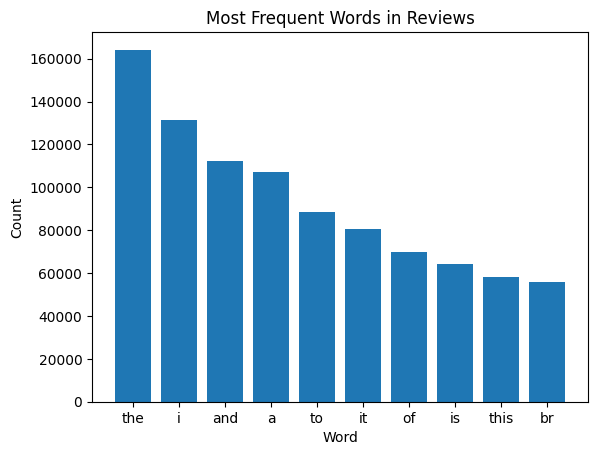

In [ ]:
tokens = Tokenizer()
tokens.fit_on_texts(data['Text'])
word_counts = tokens.word_counts
sorted_words = sorted(word_counts.items(), key=lambda item: item[1], reverse=True)
top_words = [word for word, count in sorted_words[:10]]
counts = [count for word, count in sorted_words[:10]]
plt.bar(top_words, counts)
plt.xlabel("Word")
plt.ylabel("Count")
plt.title("Most Frequent Words in Reviews")
plt.show()

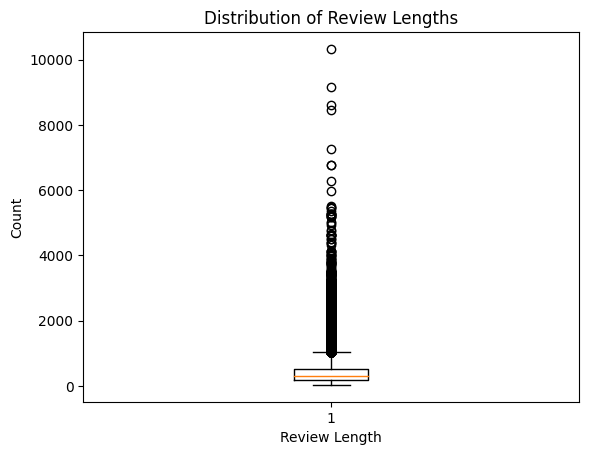

In [ ]:
review_lengths = [len(review) for review in data['Text']]
plt.boxplot(review_lengths)
plt.xlabel("Review Length")
plt.ylabel("Count")
plt.title("Distribution of Review Lengths")
plt.show()

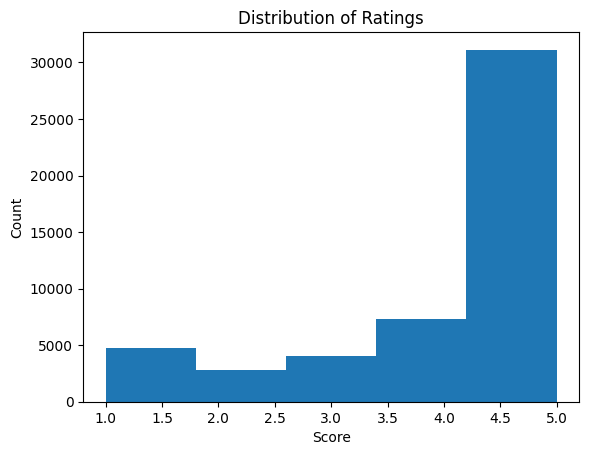

In [ ]:
plt.hist(data['Score'], bins=5)
plt.xlabel("Score")
plt.ylabel("Count")
plt.title("Distribution of Ratings")
plt.show()

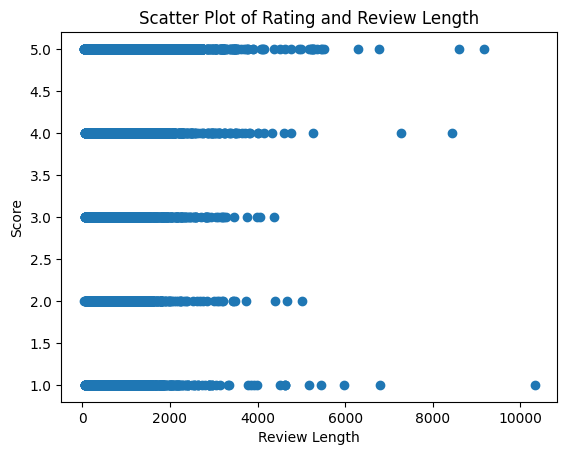

In [ ]:
plt.scatter(review_lengths, data['Score'])
plt.xlabel("Review Length")
plt.ylabel("Score")
plt.title("Scatter Plot of Rating and Review Length")
plt.show()

In [ ]:
"""from plotly.express import scatter_3d
fig = scatter_3d(df, x='Words Per Tweet', y='scaled_words_per_tweet', z='label_name',
                  color='label_name', template='plotly_white')
fig.update_layout(scene=dict(xaxis_title='Words Per Tweet',
                             yaxis_title='Scaled Words Per Tweet',
                             zaxis_title='Sentiment'))


fig.show()"""

"from plotly.express import scatter_3d\nfig = scatter_3d(df, x='Words Per Tweet', y='scaled_words_per_tweet', z='label_name',\n                  color='label_name', template='plotly_white')\nfig.update_layout(scene=dict(xaxis_title='Words Per Tweet',\n                             yaxis_title='Scaled Words Per Tweet',\n                             zaxis_title='Sentiment'))\n\n\nfig.show()"

In [ ]:

non_numeric_cols = data.select_dtypes(include=["object"]).columns.tolist()


print(f"Non-numeric columns: {non_numeric_cols}")

Non-numeric columns: ['ProductId', 'UserId', 'ProfileName', 'Summary', 'Text']


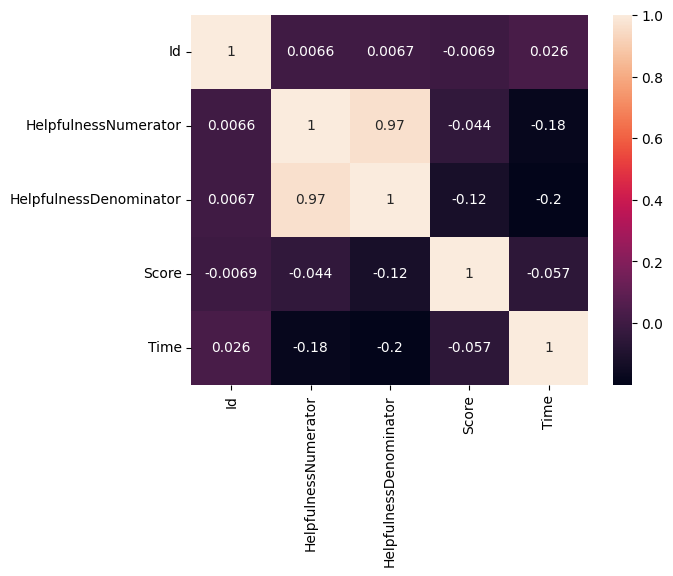

In [ ]:

dropped_data = data.drop(non_numeric_cols, axis=1)


corr_matrix = dropped_data.corr()


sns.heatmap(corr_matrix, annot=True)
plt.show()

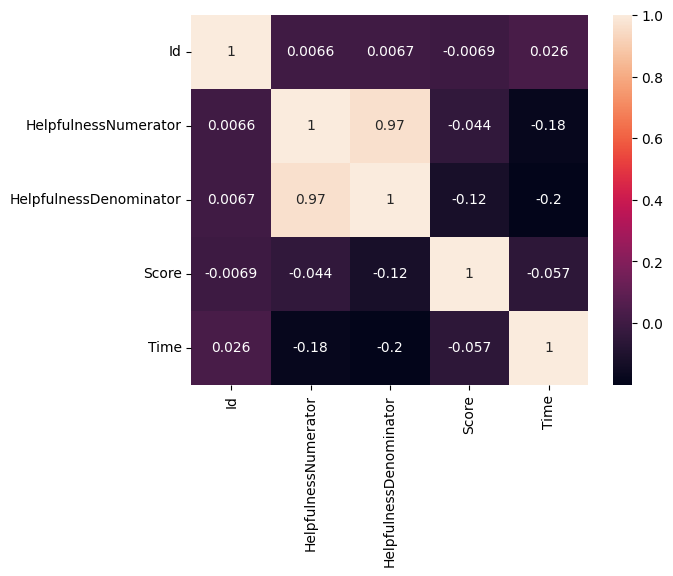

In [ ]:
corr_matrix = dropped_data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


In [ ]:
"""sentiment_crosstab = pd.crosstab(data['Score'], data['Sentiment'])
sns.heatmap(sentiment_crosstab, annot=True)
plt.show()"""

"sentiment_crosstab = pd.crosstab(data['Score'], data['Sentiment'])\nsns.heatmap(sentiment_crosstab, annot=True)\nplt.show()"

In [ ]:
data = data[['Score','Text']]

In [ ]:
data = data[:50000]

In [ ]:
data.head()

,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...


In [ ]:
"""sns.countplot(data['Score'])"""

"sns.countplot(data['Score'])"

In [ ]:
data['Score'] = data['Score'].apply(lambda x : 1 if x > 3 else 0)

sns.countplot(data['Score'])

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = stopwords.words("english")

In [ ]:
def clean(text):
    text = text.lower()
    text = re.sub("[^A-Za-z0-9]"," ",text)
    text = re.sub(r"[0-9]+"," ",text)
    text = " ".join(i for i in text.split() if i not in stop_words)
    return text

In [ ]:
data['Cleaned'] = data['Text'].apply(lambda x:  clean(x))

In [ ]:
data.head()

,Score,Text,Cleaned
0,1,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...
1,0,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanuts p...
2,1,This is a confection that has been around a fe...,confection around centuries light pillowy citr...
3,0,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...
4,1,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...


In [ ]:
from plotly.express import scatter_3d
fig = scatter_3d(data, x='Text', y='Cleaned', z='Score',
                  template='plotly_white')
fig.update_layout(scene=dict(xaxis_title='Text',
                             yaxis_title='Cleaned',
                             zaxis_title='Score'))


fig.show()

In [ ]:
img  = cloud = WordCloud().generate(" ".join(data['Cleaned'][:500].values))

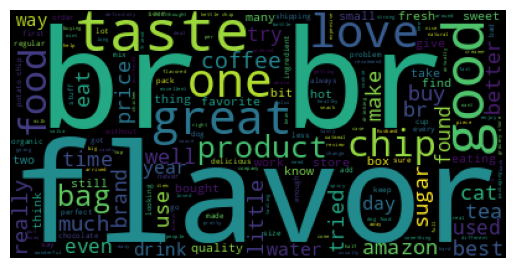

In [ ]:
plt.imshow(img)
plt.axis("off")
plt.show()

In [ ]:
tokenizer = Tokenizer(num_words=500)
tokenizer.fit_on_texts(data['Cleaned'])
x = tokenizer.texts_to_sequences(data['Cleaned'])
x = pad_sequences(x,padding='post',truncating='post',maxlen=500)

In [ ]:
x =  np.array(x)
y = np.array(data['Score'].values)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=42)

In [ ]:
x_train = x_train[:24000]
y_train = y_train[:24000]

In [ ]:
model = Sequential([
    Embedding(7000,32,input_length=500),
    Conv1D(32,3,activation='relu',padding='same'),
    MaxPooling1D(2),

    Conv1D(64,3,activation='relu'),
    MaxPooling1D(2),

    Flatten(),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           224000    
                                                                 
 conv1d (Conv1D)             (None, 500, 32)           3104      
                                                                 
 max_pooling1d (MaxPooling1  (None, 250, 32)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 248, 64)           6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 124, 64)           0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 7936)              0

In [ ]:
history  = model.fit(x_train,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
675/675 [==============================] - 34s 48ms/step - loss: 0.4290 - acc: 0.8061 - val_loss: 0.3515 - val_acc: 0.8417
Epoch 2/10
675/675 [==============================] - 47s 69ms/step - loss: 0.3570 - acc: 0.8397 - val_loss: 0.3495 - val_acc: 0.8425
Epoch 3/10
675/675 [==============================] - 31s 46ms/step - loss: 0.3331 - acc: 0.8523 - val_loss: 0.3628 - val_acc: 0.8338
Epoch 4/10
675/675 [==============================] - 31s 46ms/step - loss: 0.3055 - acc: 0.8680 - val_loss: 0.3726 - val_acc: 0.8313
Epoch 5/10
675/675 [==============================] - 33s 49ms/step - loss: 0.2639 - acc: 0.8886 - val_loss: 0.3833 - val_acc: 0.8308
Epoch 6/10
675/675 [==============================] - 33s 49ms/step - loss: 0.2226 - acc: 0.9094 - val_loss: 0.4130 - val_acc: 0.8288
Epoch 7/10
675/675 [==============================] - 32s 48ms/step - loss: 0.1746 - acc: 0.9308 - val_loss: 0.4916 - val_acc: 0.8196
Epoch 8/10
675/675 [==============================] - 32s 48ms

In [ ]:
loss,acc = model.evaluate(x_test,y_test)

157/157 [==============================] - 2s 10ms/step - loss: 0.7232 - acc: 0.8128


<Axes: title={'center': 'acc'}>

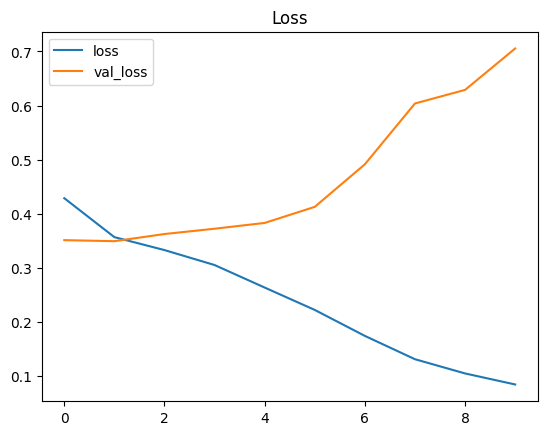

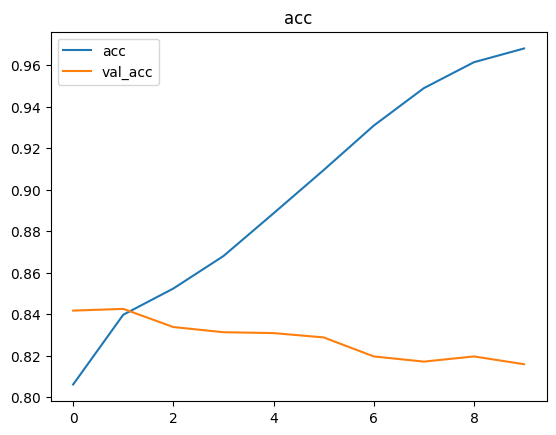

In [ ]:
history_df = pd.DataFrame(history.history)
history_df[['loss','val_loss']].plot(title='Loss')
history_df[['acc','val_acc']].plot(title='acc')

In [ ]:
def predict(data):
    data = data.reshape(-1,data.shape[0])
    pred =  model.predict(data)
    return np.argmax(pred,axis=1)[0]

In [ ]:
index = 6
print("Prediction : " ,predict(x_test[index]))
print("Actual Label : ",y_test[index])

1/1 [==============================] - 0s 98ms/step
Prediction :  0
Actual Label :  1


In [ ]:
model = SVC()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.77